In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/Data/breast_cancer.csv"
df = pd.read_csv(file_path)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Data Exploration
print("Data Shape: ", df.shape)
num_rows = df.shape[0]
num_columns = df.shape[1]
print("Number of rows: ", num_rows)
print("Number of columns: ", num_columns)

df.drop(columns=['Unnamed: 32', 'id'], inplace=True)
df.head()

# Convert labels
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df.describe()



Data Shape:  (569, 33)
Number of rows:  569
Number of columns:  33


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


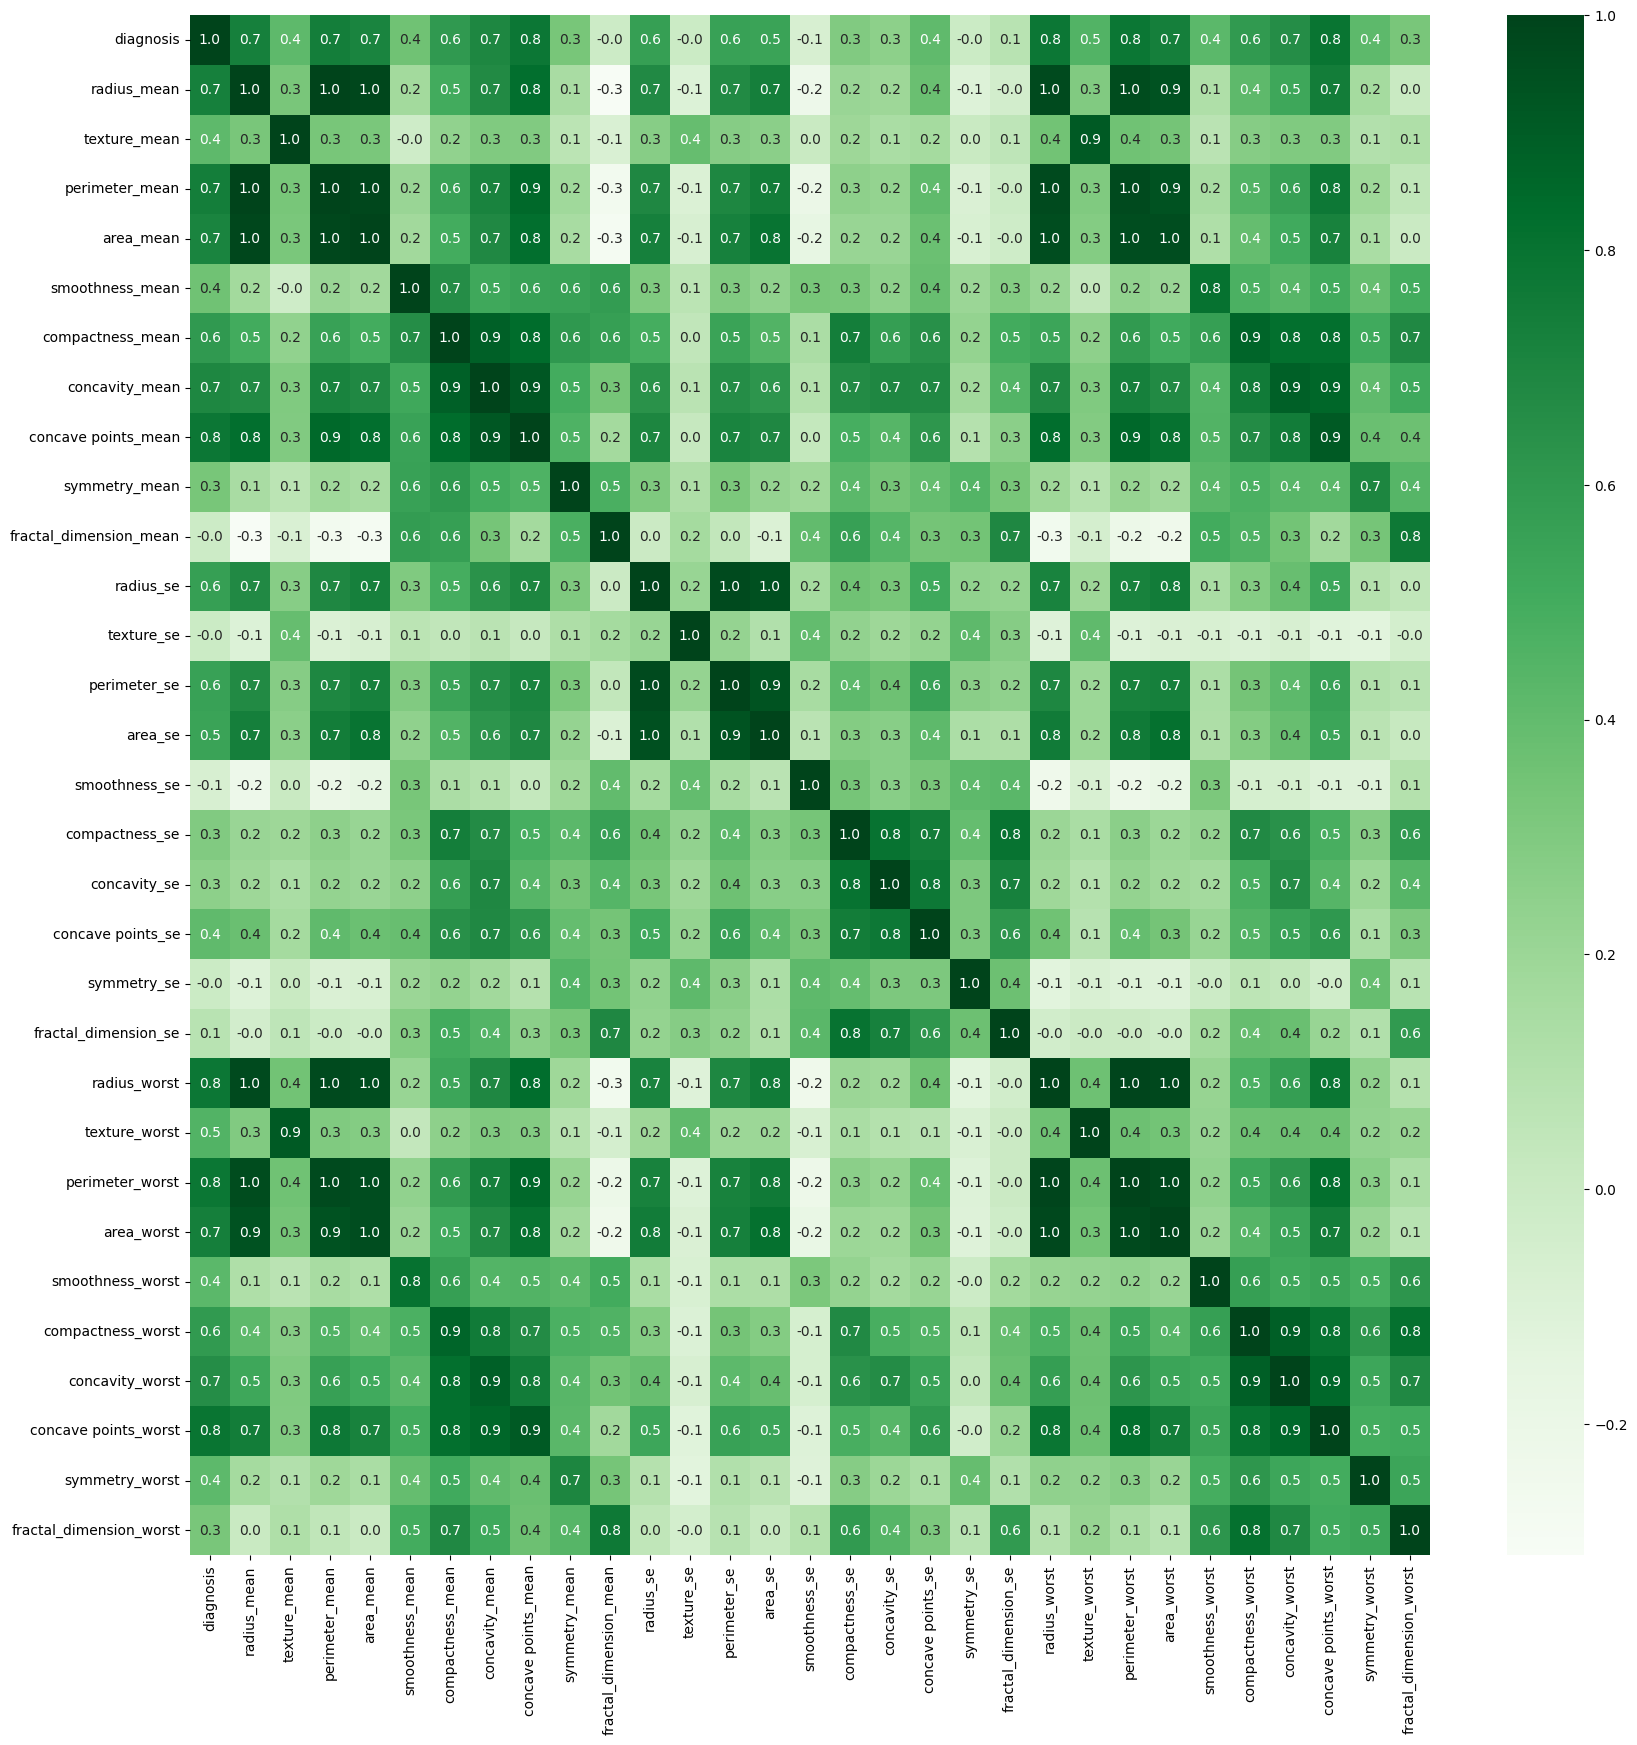

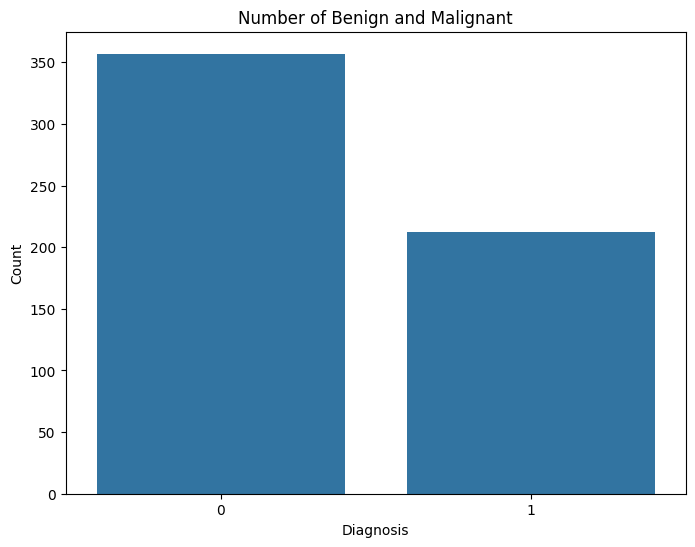

In [ ]:
# Data visualization
plt.rcParams['figure.figsize'] = (20,20)
sns.heatmap(df.corr(), annot=True,fmt='.1f',cmap='Greens')

# Plot diagnosis column
diagnosis_column = df.columns[0]
plt.figure(figsize=(8, 6))
sns.countplot(x=diagnosis_column, data=df)
plt.title('Number of Benign and Malignant')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()


In [ ]:
# Data normalization
def z_score_normalization(x, mean, std):
    return (x - mean) / std
for i in df.columns[1:]:
    mean = df[i].mean()
    std = df[i].std()
    df[i] = z_score_normalization(df[i], mean, std)
df.head()
df.describe()




,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,0.372583,-1.311195e-16,6.243785e-17,-1.123881e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,2.497514e-17,-4.995028e-17,1.748260e-16,...,-8.241796e-16,0.000000,-3.496520e-16,1.248757e-17,-2.372638e-16,-3.246768e-16,8.741299e-17,2.247763e-16,2.747265e-16,-5.744282e-16
std,0.483918,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,-2.027864e+00,-2.227289e+00,-1.982759e+00,-1.453164e+00,-3.109349e+00,-1.608721e+00,-1.113893e+00,-1.260710e+00,-2.741705e+00,...,-1.725382e+00,-2.222039,-1.691872e+00,-1.221348e+00,-2.680337e+00,-1.442609e+00,-1.304683e+00,-1.743529e+00,-2.159060e+00,-1.600431e+00
25%,0.000000,-6.887793e-01,-7.253249e-01,-6.913472e-01,-6.666089e-01,-7.103378e-01,-7.464292e-01,-7.430941e-01,-7.372951e-01,-7.026215e-01,...,-6.743279e-01,-0.747971,-6.889721e-01,-6.415713e-01,-6.906227e-01,-6.804845e-01,-7.558491e-01,-7.557349e-01,-6.412994e-01,-6.913035e-01
50%,0.000000,-2.148925e-01,-1.045442e-01,-2.357726e-01,-2.949274e-01,-3.486040e-02,-2.217454e-01,-3.419391e-01,-3.973715e-01,-7.156354e-02,...,-2.688030e-01,-0.043477,-2.857288e-01,-3.408813e-01,-4.680159e-02,-2.692639e-01,-2.180402e-01,-2.232725e-01,-1.272975e-01,-2.162538e-01
75%,1.000000,4.689800e-01,5.836621e-01,4.992377e-01,3.631877e-01,6.356397e-01,4.934227e-01,5.255994e-01,6.463664e-01,5.303125e-01,...,5.215568e-01,0.657762,5.398040e-01,3.572747e-01,5.970195e-01,5.391944e-01,5.306742e-01,7.118836e-01,4.497425e-01,4.503661e-01
max,1.000000,3.967796e+00,4.647799e+00,3.972634e+00,5.245913e+00,4.766717e+00,4.564409e+00,4.239858e+00,3.924477e+00,4.480808e+00,...,4.090590e+00,3.882489,4.283568e+00,5.924959e+00,3.951897e+00,5.108382e+00,4.696536e+00,2.683516e+00,6.040726e+00,6.840837e+00


In [ ]:
# Train/Test Split
from sklearn.model_selection import train_test_split
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (455, 30)
y_train shape:  (455,)
X_test shape:  (114, 30)
y_test shape:  (114,)


In [ ]:
# MLP from scratch

n_input = X_train.shape[1] # Number of input neurons = 30
n_hidden = 16 # Number of hidden neurons
n_output = 1 # Number of output neurons
alpha = 0.01 # learning rate

# Initialize parameters

# weights of hidden layer (He initialization for ReLU)
wh = np.random.randn(n_input, n_hidden) * np.sqrt(2. / n_input)
# biases of hidden layer
bh = np.zeros(shape=(1, n_hidden))
# weights of output layer (Xavier initialization for Sigmoid)
wo = np.random.randn(n_hidden, n_output) * np.sqrt(1. / n_hidden)
# bias of output layer
bo = np.zeros(shape=(1, n_output))

parameters = [wh, bh, wo, bo]

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
'''
def sigmoid_deriv(x):
  return 1 / (1 + np.exp(-x))'''

def relu(x):
    return np.maximum(0, x)

def relu_deriv(x):
    return (x > 0).astype(int)

# Loss function: Binary cross entropy
def loss(y_true, y_pred):
    eps = 1e-8 # Prevent Log(0)
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


# Prediction process
def predict(X, proba = True):
  threshold_proba = 0.5
  wh, bh, wo, bo = parameters
  zh = np.dot(X, wh) + bh
  ah = relu(zh) # output from hidden layer
  zo = np.dot(ah, wo) + bo
  ao = sigmoid(zo) # output from output layer
  if proba:
    return ao # Probability
  else:
    return (ao > threshold_proba).astype(int) # Label

# ao = 0.7
# 1

def forward(X_batch, parameters):
    wh, bh, wo, bo = parameters

    zh = np.dot(X_batch, wh) + bh # Input to hidden layer
    ah = relu(zh)  # Output from hidden layer
    zo = np.dot(ah, wo) + bo  # Input to output layer
    ao = sigmoid(zo)  # Output from output layer

    return ao, (zh, ah, zo)
    # ao: output
    # (zh, ah, zo):

def backward(X_batch, y_batch, parameters, cache, alpha):
    wh, bh, wo, bo = parameters
    zh, ah, zo = cache

    y_batch = y_batch.reshape(-1, 1)
    ao = sigmoid(zo)  # Recalculate or cache in forward if needed

    # Compute gradients
    d_ao = ao - y_batch
    d_wo = np.dot(ah.T, d_ao) / X_batch.shape[0]
    d_bo = np.mean(d_ao, axis=0, keepdims=True)

    d_ah = np.dot(d_ao, wo.T)
    d_zh = d_ah * relu_deriv(zh)
    d_wh = np.dot(X_batch.T, d_zh) / X_batch.shape[0]
    d_bh = np.mean(d_zh, axis=0, keepdims=True)

    # Update parameters
    wh -= alpha * d_wh
    bh -= alpha * d_bh
    wo -= alpha * d_wo
    bo -= alpha * d_bo

    return [wh, bh, wo, bo]

# Keep the train function as is, it correctly passes X_train and y_train to the inner loop
def train(X_train, y_train, X_test, y_test, epochs, batch_size):
    global parameters
    global alpha
    ht_loss = []
    hv_loss = []
    alpha_reduced = False  # Thêm dòng này

    for epoch in range(epochs):
        # Reduce learning rate once at epoch 20
        if epoch > 0 and epoch % 40 == 0:
           alpha *= 0.1

        # Shuffle the data
        indices = np.arange(X_train.shape[0])
        np.random.shuffle(indices)
        X_train = X_train[indices]
        y_train = y_train[indices]

        for batch in range(0, X_train.shape[0], batch_size):
            x_batch = X_train[batch:batch+batch_size]
            y_batch = y_train[batch:batch+batch_size]
            ao, cache = forward(x_batch, parameters)
            parameters = backward(x_batch, y_batch, parameters, cache, alpha)

        train_pred = predict(X_train)
        test_pred = predict(X_test)
        ht_loss.append(loss(y_train.reshape(-1, 1), train_pred))
        hv_loss.append(loss(y_test.reshape(-1, 1), test_pred))
        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {ht_loss[-1]:.4f}, Test Loss: {hv_loss[-1]:.4f}, Learning rate: {alpha}")

    return ht_loss, hv_loss

Epoch 1/100 - Train Loss: 0.7115, Test Loss: 0.7378, Learning rate: 0.01
Epoch 2/100 - Train Loss: 0.5697, Test Loss: 0.5814, Learning rate: 0.01
Epoch 3/100 - Train Loss: 0.4780, Test Loss: 0.4819, Learning rate: 0.01
Epoch 4/100 - Train Loss: 0.4125, Test Loss: 0.4100, Learning rate: 0.01
Epoch 5/100 - Train Loss: 0.3664, Test Loss: 0.3591, Learning rate: 0.01
Epoch 6/100 - Train Loss: 0.3322, Test Loss: 0.3219, Learning rate: 0.01
Epoch 7/100 - Train Loss: 0.3055, Test Loss: 0.2924, Learning rate: 0.01
Epoch 8/100 - Train Loss: 0.2835, Test Loss: 0.2684, Learning rate: 0.01
Epoch 9/100 - Train Loss: 0.2652, Test Loss: 0.2485, Learning rate: 0.01
Epoch 10/100 - Train Loss: 0.2499, Test Loss: 0.2320, Learning rate: 0.01
Epoch 11/100 - Train Loss: 0.2373, Test Loss: 0.2181, Learning rate: 0.01
Epoch 12/100 - Train Loss: 0.2264, Test Loss: 0.2061, Learning rate: 0.01
Epoch 13/100 - Train Loss: 0.2172, Test Loss: 0.1961, Learning rate: 0.01
Epoch 14/100 - Train Loss: 0.2093, Test Loss: 0

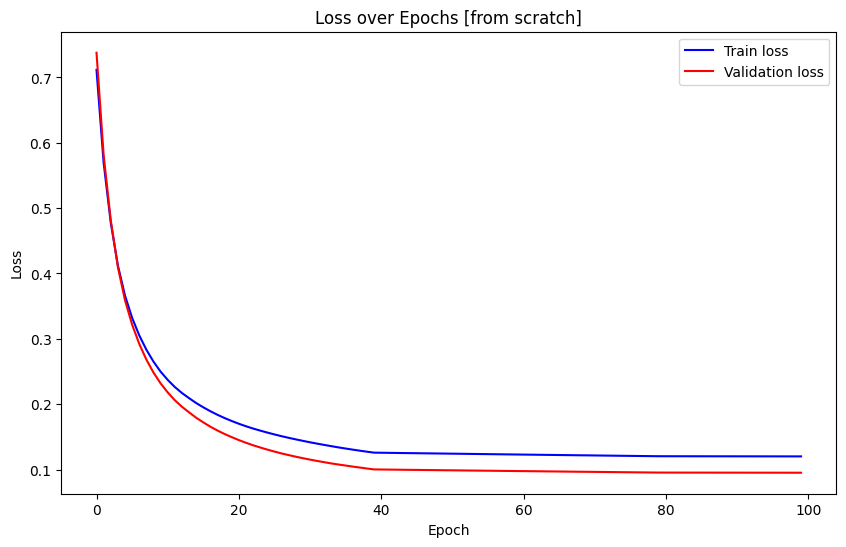

Accuracy: 0.9737
Precision: 1.0000
Recall: 0.9302
F1 Score: 0.9639


In [ ]:
# Perform training
# Pass the numpy values as before
train_loss, val_loss = train(X_train.values, y_train.values, X_test.values, y_test.values, epochs=100, batch_size=32)

# Visualize
plt.figure(figsize=(10, 6))
plt.plot(train_loss, c='blue', label='Train loss')
plt.plot(val_loss, c='red', label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs [from scratch]')
plt.legend()
plt.show()

# Model evaluation
def calculate_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def calculate_precision(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    if true_positives + false_positives == 0:
        return 0.0
    return true_positives / (true_positives + false_positives)

def calculate_recall(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))
    if true_positives + false_negatives == 0:
        return 0.0
    return true_positives / (true_positives + false_negatives)

def calculate_f1_score(precision, recall):
    if precision + recall == 0:
        return 0.0
    return 2 * (precision * recall) / (precision + recall)

def evaluate_model(y_true, y_pred):
    # Flatten y_pred to match the shape of y_true (Pandas Series)
    y_pred = y_pred.flatten()
    accuracy = calculate_accuracy(y_true, y_pred)
    precision = calculate_precision(y_true, y_pred)
    recall = calculate_recall(y_true, y_pred)
    f1 = calculate_f1_score(precision, recall)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

y_pred = predict(X_test, proba=False)
evaluate_model(y_test, y_pred)